In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import os

# do random the same everytime
np.random.seed(123)
from sklearn.model_selection import train_test_split

# mount colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Set the dataset to split
dataset_nm = 'segmented'

In [0]:
# data paths
meta_path = r'/content/drive/My Drive/Colab Notebooks/datasets/HAM10000_metadata.csv'
img_path = r'/content/drive/My Drive/Colab Notebooks/datasets/ProcessedImages/{}.npy'.format(dataset_nm)

# This dictionary is useful for displaying more human-friendly labels later on
lesion_type_dict = {
    'nmel': 'Non-Melanoma',
    'mel': 'Melanoma',
}

Shuffle the data and see that if it worked

In [0]:
def check5shuffled(meta, shuffled, images):
    # setup canvas
    fig, axis = plt.subplots(2, 5, figsize=(6, 3))
    for (idx, row), img_idx in zip(meta.iterrows(), range(5)):
        # get the shuffled image
        shuffled = shuffled_features[img_idx, :, :, :]
        axis[0, img_idx].imshow(shuffled)
        axis[0, img_idx].set_axis_off()
        
        # get the corresponding image from the unshuffled set
        image = images[idx, :, :, :]
        axis[1, img_idx].imshow(image)
        axis[1, img_idx].set_axis_off()

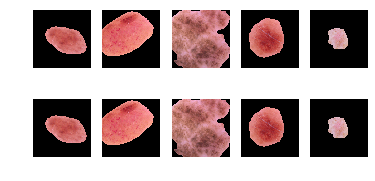

In [0]:
# get the meta data
skin_df = pd.read_csv(meta_path)

# shuffle the dataframe
skin_df = skin_df.sample(len(skin_df), random_state=1)

# get the features (images)
features = np.load(img_path)

# reorder the features the same as the shuffled datafame
shuffled_features = np.take(features, skin_df.index.values, axis=0)

# check that the shuffle worked
check5shuffled(skin_df, shuffled_features, features)

255 0


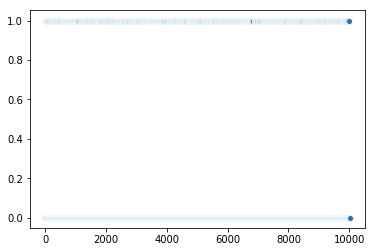

In [0]:
# normalise the features
range_ = (np.max(shuffled_features)-np.min(shuffled_features))
X = (shuffled_features - 0.5*range_)/range_

# record min and max to convert back
print(np.max(shuffled_features), np.min(shuffled_features))

# create the binary class
skin_df['binary_class'] = skin_df['dx'].map(lambda x: "mel" if x=="mel" else "nmel")
skin_df['cell_type'] = skin_df['binary_class'].map(lesion_type_dict)
skin_df['cell_type_idx'] = skin_df['binary_class'].map(lambda x: 1 if x=='mel' else 0)

# create the target array
Y=skin_df['cell_type_idx'].values

# plot the targets to test the shuffle
sns.scatterplot(x=range(len(skin_df)), y=skin_df['cell_type_idx'].values)

Check that the Melanoma type is randomly distributed for learning

In [0]:
# define the cutoffs
train = int(X.shape[0]*0.60)
valid = int(X.shape[0]*0.80)

# split into 60, 20, 20, training, validation and testing sets
x_train = X[:train, :, :, :]
y_train = Y[:train]
x_valid = X[train:valid, :, :, :]
y_valid = Y[train:valid]
x_test = X[valid:, :, :, :]
y_test = Y[valid:]

In [0]:
# save the datasets as npy files
path = r'/content/drive/My Drive/Colab Notebooks/datasets/ProcessedImages'
files = ['Xtrain.npy', 'Ytrain.npy', 'Xvalid.npy', 'Yvalid.npy', 'Xtest.npy', 'Ytest.npy']
arrays = [x_train, y_train, x_valid, y_valid, x_test, y_test]

for fnm, arr in zip(files, arrays):
    # save the results
    np.save(os.path.join(path, dataset_nm + '_' + fnm), arr)

# save the shuffled metadata
skin_df.to_csv(os.path.join(path, 'shuffled_meta.csv'), index=False)